## SAGA Paper 4, FIGURE 3

In [1]:
import numpy as np
from myplotstyle import plt,get_figsize
%matplotlib inline

import matplotlib
import matplotlib.backends.backend_pdf

from easyquery import Query, QueryMaker
import SAGA
from SAGA import ObjectCuts as C
from SAGA import HostCuts as H


In [2]:
saga = SAGA.QuickStart()

SAGA `shared_dir` set to /Users/mg37/DropBox/SAGA/
SAGA `local_dir`  set to /Users/mg37/Projects/SAGA/


In [3]:
base = H.paper3.filter(saga.object_catalog.load_combined_base_catalog())
nhosts = len(np.unique(base["HOSTID"]))
assert nhosts == 101

sats  = C.is_sat.filter(base)

## Sect 2.5:   Defining QUENCHED

In [4]:
mq      = sats['quenched'] == 1
sats_sf = sats[~mq]
sats_q  = sats[mq]

musf = sats_sf['nuv_mag_flag'] == 0
muq  = sats_q['nuv_mag_flag']  == 0

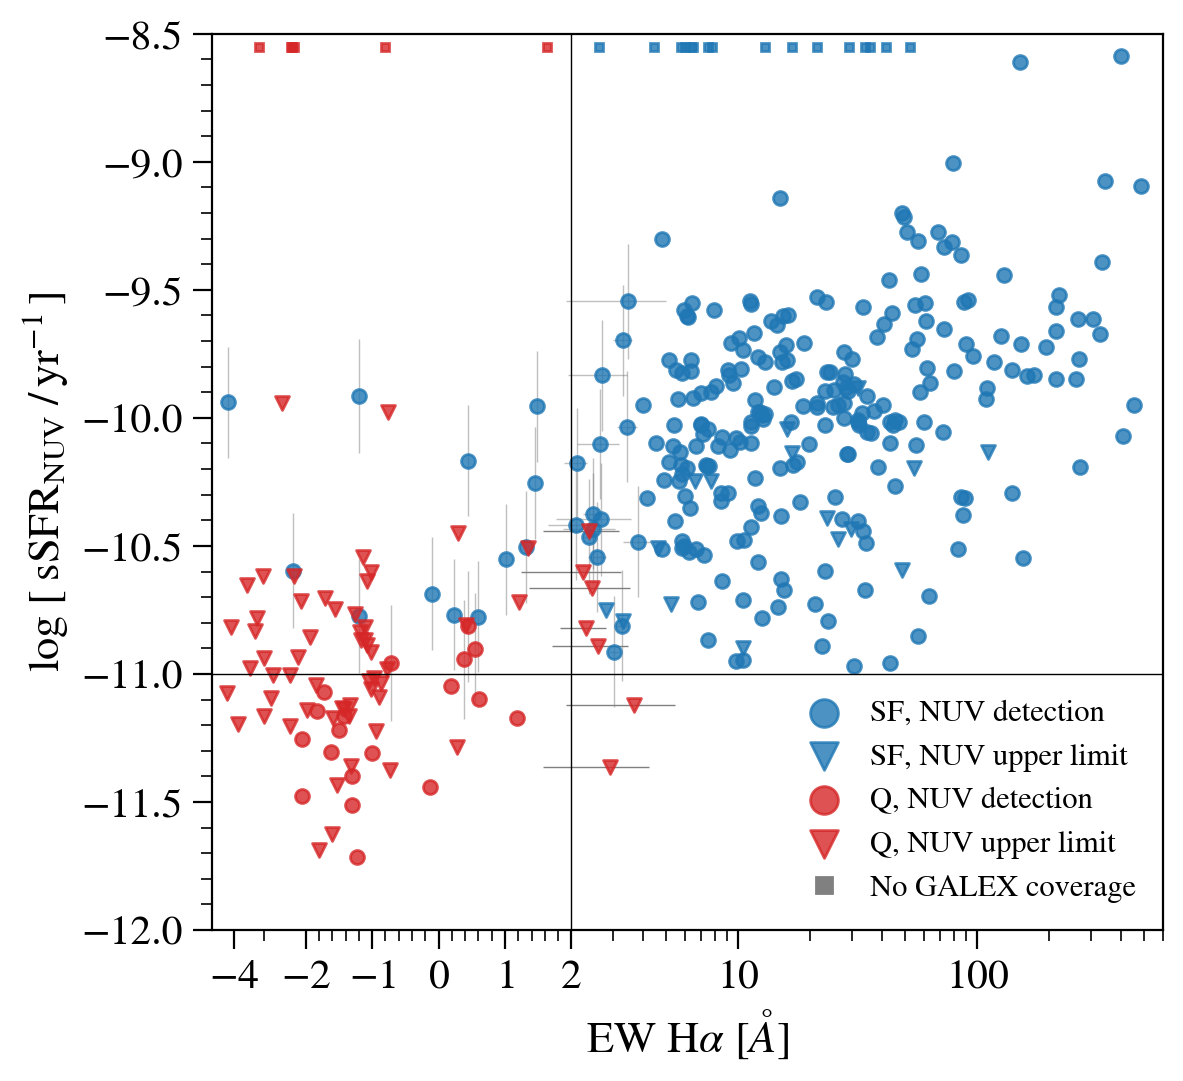

In [5]:
pdf = matplotlib.backends.backend_pdf.PdfPages('figure_quenched_def.pdf')
fig, ax = plt.subplots(figsize=get_figsize(ratio=1.1))


ax.scatter(sats_sf["EW_Halpha"][~musf], sats_sf["nuv_sfr"][~musf] - sats_sf["log_sm"][~musf],\
           marker='o',c="C0", alpha=0.8,label='SF, NUV detection')
ax.scatter(sats_sf["EW_Halpha"][musf], sats_sf["nuv_sfr"][musf] - sats_sf["log_sm"][musf], \
           marker='v',c="C0", alpha=0.8,label='SF, NUV upper limit')

ax.scatter(sats_q["EW_Halpha"][~muq], sats_q["nuv_sfr"][~muq] - sats_q["log_sm"][~muq],\
           marker='o',c="C3",alpha=0.8,label='Q, NUV detection')
ax.scatter(sats_q["EW_Halpha"][muq], sats_q["nuv_sfr"][muq] - sats_q["log_sm"][muq], \
           marker='v',c="C3",alpha=0.8,label='Q, NUV upper limit')

ax.set_xscale("symlog", linthresh=2,  linscale=0.5)

xticks = [-4,-2, -1, 0, 1, 2, 10, 100, 1000]
ax.set_xticks(xticks, labels=[f"${t}$" if t <= 1000 else f"$10^{int(np.log10(t))}$" for t in xticks]);
ax.set_xticks(np.concatenate([
    np.arange(-5, -2), 
    np.linspace(-2, 2, 21)[1:-1], 
    np.arange(3, 10), 
    np.arange(20, 100, 10), 
    np.arange(200, 1000, 100),
]), minor=True);

ax.set_xlabel(r"EW H$\alpha$ [$\AA$]")
#ax.set_ylabel(r"sSFR$_{\rm NUV}~[{\rm yr}^{-1}]$")
ax.set_ylabel(r'$\log \, [ \; {\rm sSFR}_{\rm NUV} \; / \, {\rm yr}^{-1}\,$]')



ax.axvline(2, c="k", lw=0.5)
ax.axhline(-11, c="k", lw=0.5)



# add some errorbars
mwd1 = (sats_q['EW_Halpha'] > 2) 
ax.errorbar(sats_q['EW_Halpha'][mwd1],sats_q["nuv_sfr"][mwd1] - sats_q["log_sm"][mwd1],\
               fmt='none',xerr = sats_q['EW_Halpha_err'][mwd1],c='grey',lw=0.5,zorder=0)

mwd2 = (sats['EW_Halpha'] < 2) & (sats['quenched']==1) & (sats['nuv_mag_flag']==1) & \
    ((sats["nuv_sfr"] - sats["log_sm"])>-11.15)
ssfr_err = np.sqrt(sats['nuv_sfr_err']**2 + 0.2**2)



mwd3 = (sats['EW_Halpha']<2) & (sats['nuv_sfr'] - sats['log_sm'] > -11) & (sats['quenched'] ==1)& (sats['nuv_mag_flag'] ==1)
ax.errorbar(sats['EW_Halpha'][mwd3],sats["nuv_sfr"][mwd3] - sats["log_sm"][mwd3],\
               fmt='none',yerr = ssfr_err[mwd3],c='grey',lw=0.5,alpha=0.5,zorder=0)

mwd3 = (sats['EW_Halpha']<2) & (sats['nuv_sfr'] - sats['log_sm'] > -11) & (sats['quenched'] ==0)& (sats['nuv_mag_flag'] ==1)
ax.errorbar(sats['EW_Halpha'][mwd3],sats["nuv_sfr"][mwd3] - sats["log_sm"][mwd3],\
               fmt='none',yerr = ssfr_err[mwd3],c='grey',lw=0.5,alpha=0.5,zorder=0)

mwd4 = (sats['EW_Halpha']<4) &(sats['EW_Halpha']>2.) & (sats['quenched'] ==0)& (sats['nuv_mag_flag'] ==1)
ax.errorbar(sats['EW_Halpha'][mwd4],sats["nuv_sfr"][mwd4] - sats["log_sm"][mwd4],\
               fmt='none',xerr = sats['EW_Halpha_err'][mwd4],yerr = ssfr_err[mwd4],c='grey',lw=0.5,alpha=0.5,zorder=0)

mwd5 = (sats['quenched'] ==0)& (sats['nuv_mag_flag'] ==1) & (sats['nuv_sfr'] - sats['log_sm'] < -11)
ax.errorbar(sats['EW_Halpha'][mwd5],sats["nuv_sfr"][mwd5] - sats["log_sm"][mwd5],\
               fmt='none',xerr = sats['EW_Halpha_err'][mwd5],yerr = ssfr_err[mwd5],c='grey',lw=0.5,alpha=0.5,zorder=0)


ax.set_xlim(-4.95,600)
ax.set_ylim(-12.,-8.5)


# ADD NO GALEX COVERAGE
q_no_nuv = (sats['nuv_mag_flag'] == -1) & (sats['quenched'] ==1)
yq = -8.55*np.ones(np.sum(q_no_nuv))
xq = sats['EW_Halpha'][q_no_nuv]
ax.plot(xq,yq,'s',c='C3',ms=3,alpha=0.8,label='__nolabel__')
sf_no_nuv = (sats['nuv_mag_flag'] == -1) & (sats['quenched'] ==0)& (sats['EW_Halpha'] > 1)
ysf = -8.55*np.ones(np.sum(sf_no_nuv))
xsf = sats['EW_Halpha'][sf_no_nuv]
ax.plot(xsf,ysf,'s',c='C0',ms=3,alpha=0.8,label='__nolabel__')

ax.plot([-100],[-100],'s',c='grey',ms=3,label='No GALEX coverage')

ax.legend(markerscale=2,fontsize=11,loc='lower right')

pdf.savefig()
pdf.close()